# File Input and Output in Python

## Introduction

In this lesson, you'll learn about interacting with files in Python. First you'll start by reviewing the core concepts of opening, closing, reading, and writing files, and how this process is similar and different between the familiar GUI software and using Python code. Then you'll walk through some specific examples of reading and writing files with Python, ending with a series of examples using different libraries to open different types of files.

## Objectives

You will be able to:

* Understand the core concepts of file I/O
* Read data from files into Python
* Write data from Python into files
* Describe key file types and how to interact with them in Python

## "In Memory" vs. "On Disk"

You're probably already quite familiar with the general idea of interacting with a computer file system, but let's take a step back and go over some fundamentals.

### Data in Memory

We have mainly emphasized working with Python variables *in memory*. When something is in memory, that means that it can be easily modified and that it no longer exists once the software using it (in this case, a Python kernel) stops running.

For example, take this code snippet:

In [18]:
x = [5, 6, 7]

The value of `x` currently exists in memory.

The full computer architecture details are more complex, but you can think of this information as being stored using **RAM** (either on your local computer, or in a cloud environment).

We can actually look at the address where it was stored:

In [19]:
hex(id(x))

'0x29aae7afa40'

Then let's say we modify the value of this variable:

In [20]:
x[0] = 10
x

[10, 6, 7]

If we check the address, it hasn't changed:

In [21]:
hex(id(x))

'0x29aae7afa40'

But that 5 has been completely replaced in memory with a 10. This demonstrates how easy it is to modify something in memory — you don't need to "write" or "save" explicitly, you can just change the value of the variable.

Now, restart the kernel:

![kernel menu](kernel_menu.png)

Now, if we try to access `x` again, we get an error message:

In [22]:
x

[10, 6, 7]

This demonstrates how data in memory stops being stored by the computer when the software using it stops.

As you can see, variables in memory are flexible and convenient, but they are inherently temporary and short-term. If we restart the kernel or restart the computer, we lose access to that data, which is not a good solution for retaining anything important. If we want something to be stored regardless of whether our kernel is still running, we want to use a file on disk.

### Files on Disk

In contrast to data in memory, files *on disk* are stored more permanently.

We can view a list of files in the current directory using the bash command `ls`:

In [35]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io

01/20/2025  04:04 PM    <DIR>          .
01/20/2025  04:04 PM    <DIR>          ..
01/10/2025  05:29 PM               154 .canvas
01/10/2025  05:29 PM    <DIR>          .github
01/10/2025  05:29 PM             1,928 .gitignore
01/19/2025  10:46 PM    <DIR>          .ipynb_checkpoints
01/10/2025  05:29 PM             9,216 cities.xls
01/10/2025  05:29 PM             2,261 colors_and_numbers.parquet
01/10/2025  05:29 PM             5,238 dog.jpg
01/10/2025  05:29 PM    <DIR>          dsc-github-actions-files
01/10/2025  05:29 PM               884 food_prices.csv
01/20/2025  04:04 PM            41,538 index.ipynb
01/10/2025  05:29 PM    <DIR>          index_files
01/10/2025  05:29 PM            20,489 kernel_menu.png
01/10/2025  05:29 PM               623 leia.json
01/10/2025  05:29 PM               811 leia.xml
01/10/2025  05:29 PM            56,712 plot.pkl
01/1

Again this is a bit of a simplification, but you can think of this information as being stored on the **hard drive** of the computer (local or cloud), whereas objects in memory are stored in RAM.

If we restart the kernel or restart the entire computer, those files will still be there, unchanged.

Therefore we can use files on disk, as opposed to objects in memory, to store anything that needs to persist long-term.

## File I/O

Interacting with files on disk with Python is somewhat more complex than interacting with Python variables in memory. It is a form of [I/O](https://en.wikipedia.org/wiki/Input/output) — meaning "input/output" — which means that we need to incorporate the ideas of:

1. **Opening** and **closing** files
2. **Reading from** and **writing to** files

### Opening and Closing Files

You are already familiar with the general idea of opening files using software, either through a GUI or the command line. For example, in order to open a Microsoft Word document, you would probably navigate through the file system GUI and double-click on a file with a `.docx` extension. Or in order to launch a Jupyter notebook, you would navigate through the file system via the command line and then execute `jupyter notebook` in order to open a file with a `.ipynb` extension.

The generalized steps you are taking are:

1. Locating the file
2. Opening the file using appropriate software
3. Reading and/or editing contents of the file
4. Closing the file

Those same steps apply when using Python to interact with files.

#### 1. Locating the File

In order to open a file with Python, you need to know the *path* to the file. By default this path is relative to the path you are running the Python code from.

Let's look at the files in the current directory again:

In [36]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io

01/20/2025  04:04 PM    <DIR>          .
01/20/2025  04:04 PM    <DIR>          ..
01/10/2025  05:29 PM               154 .canvas
01/10/2025  05:29 PM    <DIR>          .github
01/10/2025  05:29 PM             1,928 .gitignore
01/19/2025  10:46 PM    <DIR>          .ipynb_checkpoints
01/10/2025  05:29 PM             9,216 cities.xls
01/10/2025  05:29 PM             2,261 colors_and_numbers.parquet
01/10/2025  05:29 PM             5,238 dog.jpg
01/10/2025  05:29 PM    <DIR>          dsc-github-actions-files
01/10/2025  05:29 PM               884 food_prices.csv
01/20/2025  04:04 PM            41,538 index.ipynb
01/10/2025  05:29 PM    <DIR>          index_files
01/10/2025  05:29 PM            20,489 kernel_menu.png
01/10/2025  05:29 PM               623 leia.json
01/10/2025  05:29 PM               811 leia.xml
01/10/2025  05:29 PM            56,712 plot.pkl
01/1

Say we want to open `zen_of_python.txt`. It is located in the same directory that this Python code is running from, so the relative file path is simply `zen_of_python.txt`.

In [37]:
file_path = "zen_of_python.txt"

The paths work the same as paths on your computer's operating system. So, for example, if you were running this on a Mac computer and the file was located in a subdirectory called `files`, then the path would be `files/zen_of_python.txt`. Or if the file was located in the directory above the current one, then the path would be `../zen_of_python.txt`. While we won't get into the details here, the Python `os` module ([documentation here](https://docs.python.org/3/library/os.html)) is helpful if you need to write code that will be compatible with multiple different operating systems or if you need the absolute path to a file rather than the relative path.

#### 2. Opening the File Using Appropriate Software

Just like a `.docx` file needs to be opened with software like Microsoft Word, and a `.ipynb` file needs to be opened with software like Jupyter Notebook, you need to make sure you are opening and reading files with Python using the appropriate configuration.

Fortunately a plain text file is quite simple, and does not require any additional libraries or parameters to open it. (We will get into some examples of how to open more-complex files later.) All we need to do is use the `open` built-in function:

In [38]:
file_obj = open(file_path)

Ok, we opened the file! What do we have now?

In [39]:
type(file_obj)

_io.TextIOWrapper

As you can see, we have an object with "IO" in the name, and it is treating the opened file as containing "text" because we didn't specify any additional parameters. Note that this is **not** because of the file extension (`.txt`) — Python does not automatically do anything with the file based on the file extension, and the behavior so far would be the same if we had specified a path ending with `.png` instead.

Can we just print the contents of the file now?

In [40]:
print(file_obj)

<_io.TextIOWrapper name='zen_of_python.txt' mode='r' encoding='cp1252'>


Not exactly. We have *opened* the file, but if we want to get its contents, that is a separate step of *reading* from the file.

#### 3. Reading and/or Editing Contents of the File

This is possibly the most confusing part of working with files in Python compared to the software we are used to using. With Microsoft Word, for example, opening a file and reading the contents of a file are all part of the same step. However in Python, opening and reading are separate.

One reason for this is that computers typically have significantly more space in the hard drive than the RAM. Even without getting into true "big data" that requires special tooling, we might have a file stored on the hard drive that contains multiple gigabytes of data, but only 1 gigabyte of available RAM space. With Python file I/O, you could separate the processing of that file into chunks — only reading in, say, 100 lines at a time — so that you never exceed the available RAM.

Since this file is fairly small, we will go ahead and read all of the contents at once into memory, using the `readlines()` method.

In [41]:
file_contents = file_obj.readlines()

Now what do we have?

In [42]:
type(file_contents)

list

And what is in that list?

In [43]:
file_contents[0]

'The Zen of Python, by Tim Peters\n'

We can treat this like any other list of strings.

In [44]:
for line in file_contents:
    print(
        line, end="" )# end="" to avoid double-spacing since strings already end with \n

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!



Great! Now we have taken data stored in a file on disk and loaded it into a Python object in memory!

Note that if we try to read from the same file again, we will not get any content:

In [45]:
file_obj.readlines()

[]

This is because the Python file interface is kind of like a physical piece of media (e.g. a music CD) — it reads once from the beginning to the end, and then the content is over. If, for some reason, you need to read from the same file again, you can use the `.seek` method ([documentation here](https://docs.python.org/3/library/io.html#io.IOBase.seek)) to go back to the beginning, but in general your code will be faster and more efficient if you structure the logic so that you only read through the file once.

In [46]:
file_obj.seek()

TypeError: seek expected at least 1 argument, got 0

#### 4. Closing the File

Once you are finished reading from the file, close it using the `.close` method:

In [47]:
file_obj.close()

This means that your Python code is fully disconnected from the file. If you try to read from the file object again, you will get an error message:

In [48]:
file_obj.readlines()

ValueError: I/O operation on closed file.

Once the file is closed, you can go on to analyze the data using Python. For example, if we wanted to count how many lines of that document contain the phrase "is better than", we might do something like this:

In [49]:
is_better_than_count = 0
for line in file_contents:
    if "is better than" in line:
        is_better_than_count += 1

print("The phrase 'is better than' appears", is_better_than_count, "times")

The phrase 'is better than' appears 7 times


#### Shortened Syntax Using `with`

The file objects created by the `open` function are "context managers" meaning they support a compound statement called `with` ([documentation here](https://docs.python.org/3/reference/compound_stmts.html#with)).

When you use `with open` to start a block, the file object will automatically close at the end of that block. So we could re-write the previous steps.

From this:

In [50]:
file_obj = open(file_path)
file_contents = file_obj.readlines()
file_obj.close()

To this:

In [51]:
with open(file_path) as file_obj:
    file_contents = file_obj.readlines()

You'll see both forms going forward, depending on the overall structure of the code.

### Reading from and Writing to Files

#### Additional Reading Examples

In the previous example, we used the `.readlines()` method to read all of the lines of the file into a list of strings. Depending on the task, you might want to use a different reading method.

* `.read()` will read the entire contents into a single string, or `.read(size)` will read up to `size` number of characters into a single string
* `.readline()` will read just one line of the file into a string

#### Writing to Files

If you have some information in memory in Python and you want to store it to a file on disk, you need to write to a file. Unlike with something like a `.ipynb` file + Jupyter Notebook, there isn't a concept like "editing" where you are viewing and changing the contents of a file all at once. Instead, you are either reading from a file or writing to a file.

One typical pattern is to read from one "raw" file, and write to another "cleaned" file. Let's take that `zen_of_python.txt` file and make a "cleaned" version where all of the words have been converted to lowercase, and all of the punctuation has been stripped.

The process for reading the data has already been completed, and each line is stored in the variable `file_contents`:

In [52]:
file_contents

['The Zen of Python, by Tim Peters\n',
 '\n',
 'Beautiful is better than ugly.\n',
 'Explicit is better than implicit.\n',
 'Simple is better than complex.\n',
 'Complex is better than complicated.\n',
 'Flat is better than nested.\n',
 'Sparse is better than dense.\n',
 'Readability counts.\n',
 "Special cases aren't special enough to break the rules.\n",
 'Although practicality beats purity.\n',
 'Errors should never pass silently.\n',
 'Unless explicitly silenced.\n',
 'In the face of ambiguity, refuse the temptation to guess.\n',
 'There should be one-- and preferably only one --obvious way to do it.\n',
 "Although that way may not be obvious at first unless you're Dutch.\n",
 'Now is better than never.\n',
 'Although never is often better than *right* now.\n',
 "If the implementation is hard to explain, it's a bad idea.\n",
 'If the implementation is easy to explain, it may be a good idea.\n',
 "Namespaces are one honking great idea -- let's do more of those!\n",
 '\n']

Then this code will create a cleaned version:

In [53]:
import string

file_contents_cleaned = []
for line in file_contents:
    words = line.split()
    cleaned_words = [word.strip(string.punctuation).lower() for word in words]
    cleaned_line = " ".join(cleaned_words) + "\n"
    file_contents_cleaned.append(cleaned_line)
file_contents_cleaned

['the zen of python by tim peters\n',
 '\n',
 'beautiful is better than ugly\n',
 'explicit is better than implicit\n',
 'simple is better than complex\n',
 'complex is better than complicated\n',
 'flat is better than nested\n',
 'sparse is better than dense\n',
 'readability counts\n',
 "special cases aren't special enough to break the rules\n",
 'although practicality beats purity\n',
 'errors should never pass silently\n',
 'unless explicitly silenced\n',
 'in the face of ambiguity refuse the temptation to guess\n',
 'there should be one and preferably only one obvious way to do it\n',
 "although that way may not be obvious at first unless you're dutch\n",
 'now is better than never\n',
 'although never is often better than right now\n',
 "if the implementation is hard to explain it's a bad idea\n",
 'if the implementation is easy to explain it may be a good idea\n',
 "namespaces are one honking great idea  let's do more of those\n",
 '\n']

Let's say we want to write this result to a new file called `zen_of_python_cleaned.txt`. If we check using `ls`, this file currently doesn't exist:

In [54]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io

01/20/2025  04:04 PM    <DIR>          .
01/20/2025  04:04 PM    <DIR>          ..
01/10/2025  05:29 PM               154 .canvas
01/10/2025  05:29 PM    <DIR>          .github
01/10/2025  05:29 PM             1,928 .gitignore
01/19/2025  10:46 PM    <DIR>          .ipynb_checkpoints
01/10/2025  05:29 PM             9,216 cities.xls
01/10/2025  05:29 PM             2,261 colors_and_numbers.parquet
01/10/2025  05:29 PM             5,238 dog.jpg
01/10/2025  05:29 PM    <DIR>          dsc-github-actions-files
01/10/2025  05:29 PM               884 food_prices.csv
01/20/2025  04:04 PM            41,538 index.ipynb
01/10/2025  05:29 PM    <DIR>          index_files
01/10/2025  05:29 PM            20,489 kernel_menu.png
01/10/2025  05:29 PM               623 leia.json
01/10/2025  05:29 PM               811 leia.xml
01/10/2025  05:29 PM            56,712 plot.pkl
01/1

If we want to store the result in a file, first we need to open it. To open a file **for writing** we need to specify an additional parameter, `mode`. We set this to `"w"`, for "write".

Conveniently, if we are in write mode and we specify the path of a file that doesn't currently exist, the file will automatically be created.

In [55]:
output_file_obj = open("zen_of_python_cleaned.txt", mode="w")

Now if we check, there is an empty file with the specified name:

In [56]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io

01/20/2025  04:04 PM    <DIR>          .
01/20/2025  04:04 PM    <DIR>          ..
01/10/2025  05:29 PM               154 .canvas
01/10/2025  05:29 PM    <DIR>          .github
01/10/2025  05:29 PM             1,928 .gitignore
01/19/2025  10:46 PM    <DIR>          .ipynb_checkpoints
01/10/2025  05:29 PM             9,216 cities.xls
01/10/2025  05:29 PM             2,261 colors_and_numbers.parquet
01/10/2025  05:29 PM             5,238 dog.jpg
01/10/2025  05:29 PM    <DIR>          dsc-github-actions-files
01/10/2025  05:29 PM               884 food_prices.csv
01/20/2025  04:04 PM            41,538 index.ipynb
01/10/2025  05:29 PM    <DIR>          index_files
01/10/2025  05:29 PM            20,489 kernel_menu.png
01/10/2025  05:29 PM               623 leia.json
01/10/2025  05:29 PM               811 leia.xml
01/10/2025  05:29 PM            56,712 plot.pkl
01/1

Next, let's loop over our cleaned text and write it to the new file object using the `.write` method:

In [57]:
for line in file_contents_cleaned:
    output_file_obj.write(line)

It is important to note that this data is currently still stored *only* in memory. It has been written to `output_file_obj`, which is a Python object, but there is a buffer between data being written to the file object and data being written to the actual file on disk.

We can see this if we use the `-s` argument with the `ls` command, which shows that the size of `zen_of_python_cleaned.txt` is still zero:

In [58]:
! dir -s

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io



File Not Found


In order to ensure that the data is actually written to the file on disk, we need to close the file object.

In [59]:
output_file_obj.close()

Now `zen_of_python_cleaned.txt` is no longer empty, and is approximately the same size as the original raw data:

In [60]:
! dir -s

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-file-io



File Not Found


**If you are ever wondering why your data has not actually been saved to a file, double-check that the file has been closed, or that the buffer has been cleared in some other way.** It is a best practice to close files when you are finished with them whether the files are used for reading or writing, but writing is where failing to close a file can cause more significant problems.

Some of the tools we will introduce later will handle the file opening/closing for you, but sometimes it's important to understand what is happening "under the hood" in order to debug issues like this.

## Dealing with Different File Types

The examples so far have used files containing text data, which is straightforward to use in Python because it neatly corresponds to the string data type. For more-complex file types, we will often need to use additional modules or libraries.

Here is a high-level overview of how you might open various file types with Python. For now we will only look at reading this data, but there is almost always a corresponding technique with that library to write to that type of file, just like we have both `.read` and `.write` with the built-in Python file objects.

### Tabular Data Files

Tabular data means data that can be represented as a table of rows and columns. Some common ways that tabular data is stored include CSV (`.csv`) and Excel (`.xls` or `.xlsx`) files.

#### CSV

If we open a CSV file as though it were just a text file, it would look something like this:

In [61]:
with open("food_prices.csv") as f:
    print(f.readline())
    print(f.readline())
    print(f.readline())

City,Bread,Burger,Milk,Oranges,Tomatoes

ATLANTA,24.5,94.5,73.9,80.1,41.6

BALTIMORE,26.5,91.0,67.5,74.6,53.3



Just like with `zen_of_python.txt`, we have successfully read in the data as a collection of strings.

In theory we could try to parse the relevant information from that using string processing, but a better technique would be to use the `csv` module, which is designed to work with this type of file:

In [62]:
import csv

with open("food_prices.csv") as f:
    reader = csv.DictReader(f)
    print(next(reader))
    print(next(reader))

{'City': 'ATLANTA', 'Bread': '24.5', 'Burger': '94.5', 'Milk': '73.9', 'Oranges': '80.1', 'Tomatoes': '41.6'}
{'City': 'BALTIMORE', 'Bread': '26.5', 'Burger': '91.0', 'Milk': '67.5', 'Oranges': '74.6', 'Tomatoes': '53.3'}


That way, we are converting the table of data into a dictionary representing each row, instead of treating each line as a string.

#### Excel

If we open an Excel spreadsheet file as though it were just a text file, it would look something like this:

In [63]:
with open("cities.xls", mode="rb") as f:
    print(f.read(500))

b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\r\x00\x00\x00\x01\x00\x00\x00\x00\x10\x00\x00\x0f\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x10\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\

That is even further from something that we can meaningfully parse! All of the `\x` encoding means that this is data is not text, it is binary data encoded as bytes.

Again, there is a library called XLRD we can use to bring this into Python in a more useful way:

In [64]:
! pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
   ------------ --------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 195.7 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 195.7 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/96.5 kB 217.9 kB/s eta 0:00:01
   --------------------------------- ------ 81.9/96.5 kB 254.2 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 250.8 kB/s eta 0:00:00


In [65]:
import xlrd

book = xlrd.open_workbook("cities.xls")
sheet = book.sheet_by_name("Sheet1")
columns = [sheet.cell_value(0, col) for col in range(sheet.ncols)]

for row in range(1, 4):
    row_dict = {}
    for col_index, col_value in enumerate(columns):
        row_dict[col_value] = sheet.cell_value(row, col_index)
    print(row_dict)

{'City': 'Solta', 'Country': 'Croatia', 'Population': 1700.0, 'Area': 59.0}
{'City': 'Greenville', 'Country': 'USA', 'Population': 84554.0, 'Area': 68.0}
{'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 13591863.0, 'Area': 4758.0}


(Don't worry too much about the details of this example, but note that this is a library that opens and closes the file for us, so you don't need to use `.open` or `.close`, we just need to specify the path to the file.)

### Other Data Files

Sometimes data is stored in a structured but non-tabular format. These formats include JSON (`.json`), XML (`.xml`), Apache Parquet (`.parquet`), and pickle (`.pkl`). We'll review each briefly.

#### JSON

JSON files are structured similarly to dictionaries, and can contain nested data. The `json` module allows you to load them into memory using Python data types (in this case, a dictionary).

The raw file looks like this:

```
{
	"name": "Leia Organa",
	"height": "150",
	"mass": "49",
	"hair_color": "brown",
	"skin_color": "light",
	"eye_color": "brown",
	"birth_year": "19BBY",
	"gender": "female",
	"homeworld": "http://swapi.dev/api/planets/2/",
	"films": [
		"http://swapi.dev/api/films/1/",
		"http://swapi.dev/api/films/2/",
		"http://swapi.dev/api/films/3/",
		"http://swapi.dev/api/films/6/"
	],
	"species": [],
	"vehicles": [
		"http://swapi.dev/api/vehicles/30/"
	],
	"starships": [],
	"created": "2014-12-10T15:20:09.791000Z",
	"edited": "2014-12-20T21:17:50.315000Z",
	"url": "http://swapi.dev/api/people/5/"
}
```

Opening it in Python looks like this:

In [66]:
import json

with open("leia.json") as f:
    leia_data = json.load(f)
leia_data

{'name': 'Leia Organa',
 'height': '150',
 'mass': '49',
 'hair_color': 'brown',
 'skin_color': 'light',
 'eye_color': 'brown',
 'birth_year': '19BBY',
 'gender': 'female',
 'homeworld': 'http://swapi.dev/api/planets/2/',
 'films': ['http://swapi.dev/api/films/1/',
  'http://swapi.dev/api/films/2/',
  'http://swapi.dev/api/films/3/',
  'http://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['http://swapi.dev/api/vehicles/30/'],
 'starships': [],
 'created': '2014-12-10T15:20:09.791000Z',
 'edited': '2014-12-20T21:17:50.315000Z',
 'url': 'http://swapi.dev/api/people/5/'}

#### XML

XML also works with nested data. Here we have the same data about Leia Organa in XML format. The raw file looks like this:

```
<?xml version="1.0"?>
<person>
  <name>Leia Organa</name>
  <height>150</height>
  <mass>49</mass>
  <hair_color>brown</hair_color>
  <skin_color>light</skin_color>
  <eye_color>brown</eye_color>
  <birth_year>19BBY</birth_year>
  <gender>female</gender>
  <homeworld>http://swapi.dev/api/planets/2/</homeworld>
  <films>
    <film>http://swapi.dev/api/films/1/</film>
    <film>http://swapi.dev/api/films/2/</film>
    <film>http://swapi.dev/api/films/3/</film>
    <film>http://swapi.dev/api/films/6/</film>
  </films>
  <species />
  <vehicles>
    <vehicle>http://swapi.dev/api/vehicles/30/</vehicle>
  </vehicles>
  <starships />
  <created>2014-12-10T15:20:09.791000Z</created>
  <edited>2014-12-20T21:17:50.315000Z</edited>
  <url>http://swapi.dev/api/people/5/</url>
</person>
```

Opening it in Python looks like this:

In [67]:
import xml.etree.ElementTree as ET

tree = ET.parse("leia.xml")
root = tree.getroot()
print("Tree:", tree)
print("Root:", root)
print("Child nodes:")

for child in root:
    if len(list(child)) > 0:
        print(child.tag, "| [", child[0], "... ]")
    elif child.text:
        print(child.tag, "|", child.text)

Tree: <xml.etree.ElementTree.ElementTree object at 0x0000029AADC942C0>
Root: <Element 'person' at 0x0000029AAE805710>
Child nodes:
name | Leia Organa
height | 150
mass | 49
hair_color | brown
skin_color | light
eye_color | brown
birth_year | 19BBY
gender | female
homeworld | http://swapi.dev/api/planets/2/
films | [ <Element 'film' at 0x0000029AAD9E92B0> ... ]
vehicles | [ <Element 'vehicle' at 0x0000029AAD9E9530> ... ]
created | 2014-12-10T15:20:09.791000Z
edited | 2014-12-20T21:17:50.315000Z
url | http://swapi.dev/api/people/5/


#### Apache Parquet

Apache Parquet is a format designed for *columnar* data rather than data stored by row as it is in a traditional tabular format. This format is most often used for big data.  See documentation [here](https://arrow.apache.org/docs/python/parquet.html). For example, say we have this dataset:

| color  | number |
| ------ | ------ |
| green  | 7      |
| red    | 2      |
| orange | 1      |

Loading just the `color` column of that dataset from a parquet file would look like this:

In [68]:
import pyarrow.parquet as pq

table = pq.read_table("colors_and_numbers.parquet", columns=["color"])
table["color"]

[
  [
    "green",
    "red",
    "orange"
  ]
]

#### Pickle

Pickle allows you to serialize Python objects even if they are not simple data structures like lists and dictionaries. See documentation [here](https://docs.python.org/3/library/pickle.html). For example, you could create a Matplotlib figure, save it to a pickle file, load the figure, then customize its appearance:

In [69]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(15)
y = np.random.rand(15)

fig, axes = plt.subplots()
axes.set_xlabel("X Label That Was Set Before Pickling")
axes.scatter(x, y)

pickle.dump(fig, open("plot.pkl", "wb"))

plt.close("all")

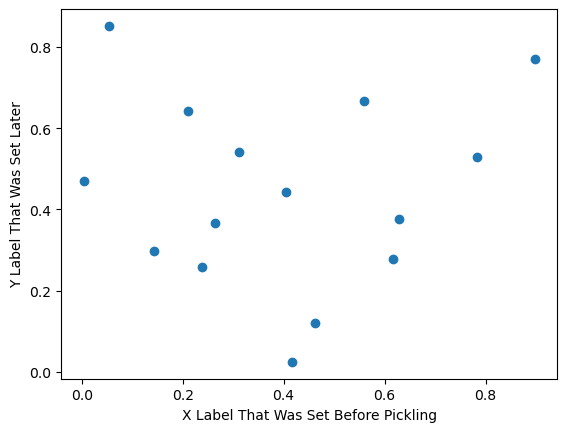

In [70]:
with open("plot.pkl", "rb") as f:
    fig = pickle.load(f)
    ax = fig.gca()
    ax.set_ylabel("Y Label That Was Set Later")

#### IMPORTANT SECURITY NOTE

Both XML and pickle formats are **not secure** — if you open an XML or pickle file, you are essentially allowing the author of that file to execute code on your computer.

You want to be sure that you trust the origin of the XML or pickle file, and you should avoid opening random files found online.

The other file formats shown here are much more secure and have more built-in protections against malicious content.

### Images

As you might expect, if we open an image like a text file and view its raw contents, we'll see mostly unintelligible byte code.

For example, let's look at this file from the Wikimedia Commons, which is also saved in this directory as `dog.jpg`.

<a title="Druidk9, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Labrador_Chocolate.jpg"><img width="128" alt="Labrador Chocolate" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Labrador_Chocolate.jpg"></a>

In [71]:
with open("dog.jpg", mode="rb") as f:
    print(f.read(500))

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x00\x80\x00\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x07\x00\x01\xff\xc4\x008\x10\x00\x02\x01\x02\x05\x03\x02\x05\x02\x04\x06\x02\x03\x00\x00\x00\x01\x02\x03\x04\x11\x00\x05\x12!1\x13AQ"a\x06\x142q\x81\x91\xa1\x15#\xb1\xd1\x07BR\xc1\xe1\xf0$b%\x82\xf1\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x05\x00\x06\xff\xc4\x00)\x11\x00\x02\x02\x02\x02\x01\x04\x01\x03\x05\x00\x00\x00\x00\x00\x00\x01\x02\x00\x11\x03\x12!1\x04\x13"AQ\x05aq\x812BR\x91\xd1\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?

The library you use to open an image file depends on what you want to do with it. For example, if you want to use it as the background of a graph, you could do that with Matplotlib:

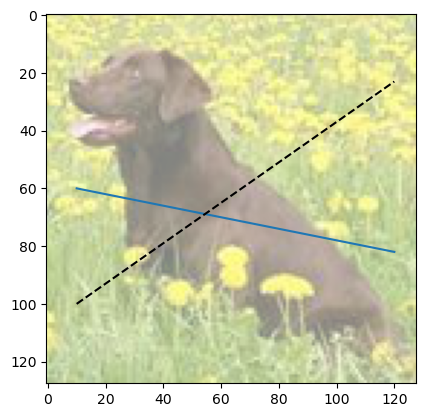

In [72]:
image = plt.imread("dog.jpg")
fig, ax = plt.subplots()
ax.imshow(image, alpha=0.5)
ax.plot(range(10, 130, 10), range(60, 84, 2))
ax.plot(range(10, 130, 10), range(100, 16, -7), "k--");

If you want to manipulate the image in some way, you could use an image-specific library like Pillow ([documentation here](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)):

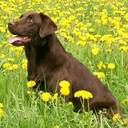

In [73]:
from PIL import Image

image = Image.open("dog.jpg")
display(image)

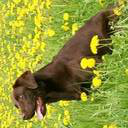

In [74]:
# Rotate 90 degrees
image_rotated = image.transpose(Image.ROTATE_90)
display(image_rotated)

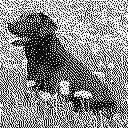

In [75]:
# Convert to simplified black and white
image_bw = image.convert("1")
display(image_bw)

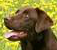

In [76]:
# Crop
image_cropped = image.crop((4, 5, 61, 55))
display(image_cropped)

There are also libraries with functionality specifically designed for feeding images into machine learning models, such as [Keras](https://keras.io/api/preprocessing/image/).

## Summary

As a data scientist, file input and output is a key way for your code to interact with various kinds of data and to save your work "on disk". In this lesson we walked through the underlying concepts needed to work with files in Python, and provided examples of opening numerous file types with various libraries.